In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score
from google.colab import drive

In [ ]:
train_dir = '/content/drive/MyDrive/Datasetf/Train'
test_dir = '/content/drive/MyDrive/Datasetf/Test'

In [ ]:
# ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and testing data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='binary')

Found 17493 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
# Visualize some sample images
def plot_sample_images(generator, classes):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(classes[int(labels[i])])
        plt.axis('off')
    plt.show()

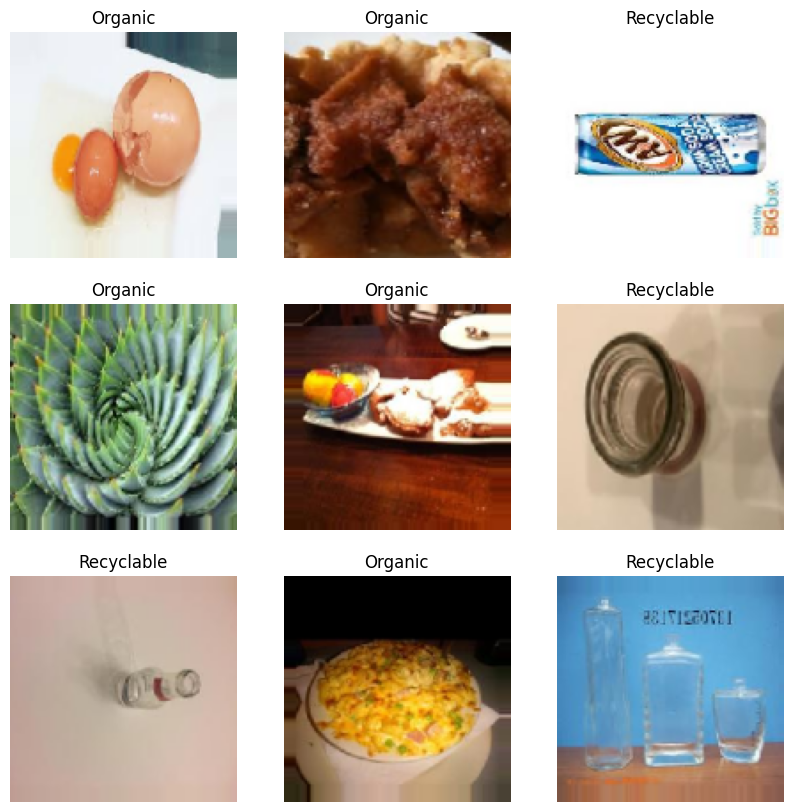

In [ ]:
plot_sample_images(train_generator, ['Organic', 'Recyclable'])

In [ ]:
# CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


546/546 ━━━━━━━━━━━━━━━━━━━━ 9373s 17s/step - accuracy: 0.8011 - loss: 0.4444 - val_accuracy: 0.8812 - val_loss: 0.2997
Epoch 2/30
  1/546 ━━━━━━━━━━━━━━━━━━━━ 8:10 900ms/step - accuracy: 0.7500 - loss: 0.3787

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


546/546 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7500 - loss: 0.3787 - val_accuracy: 0.8125 - val_loss: 0.3163
Epoch 3/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.8716 - loss: 0.3183 - val_accuracy: 0.8890 - val_loss: 0.2799
Epoch 4/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.8438 - loss: 0.2677 - val_accuracy: 0.7500 - val_loss: 0.6468
Epoch 5/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.8834 - loss: 0.2859 - val_accuracy: 0.8727 - val_loss: 0.3070
Epoch 6/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.9688 - loss: 0.0881 - val_accuracy: 0.8750 - val_loss: 0.1965
Epoch 7/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.8919 - loss: 0.2735 - val_accuracy: 0.8613 - val_loss: 0.3604
Epoch 8/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - accuracy: 0.9688 - loss: 0.0654 - val_accuracy: 0.7500 - val_loss: 0.3625
Epoch 9/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.8958 - loss: 0.2579 - val_accuracy: 0

In [ ]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 75s 397ms/step - accuracy: 0.9067 - loss: 0.2463
Test Accuracy: 0.9026666879653931


In [ ]:
# Predict on the test data
y_pred = model.predict(test_generator, verbose=1)
y_pred_class = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 371ms/step


In [ ]:
# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)
accuracy = accuracy_score(y_true, y_pred_class)
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_true, y_pred_class, target_names=['Organic', 'Recyclable']))

F1 Score: 0.5180223285486444
Precision: 0.4966360856269113
Accuracy: 0.49633333333333335
              precision    recall  f1-score   support

     Organic       0.50      0.45      0.47      3000
  Recyclable       0.50      0.54      0.52      3000

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



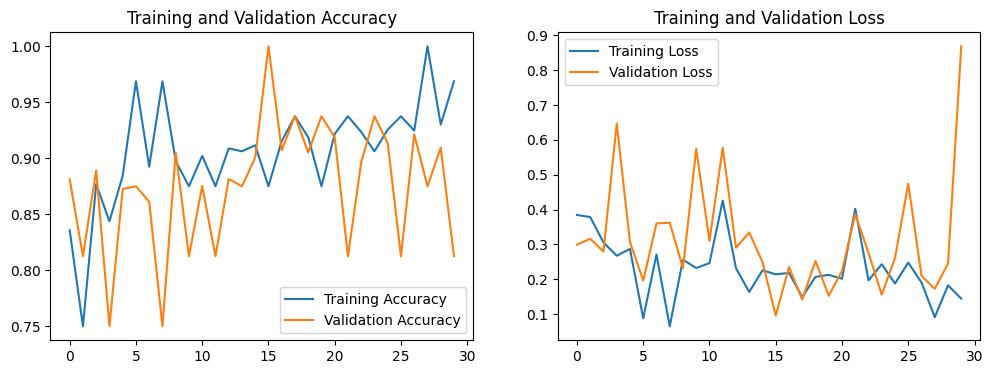

In [ ]:
# Plot training and validation accuracy and loss
def plot_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_performance(history)

In [ ]:
# Step 7: Predicting new user-uploaded test image
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_waste(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction > 0.5:
        return 'Recyclable'
    else:
        return 'Organic'

# Example of user-uploaded image
user_test_image = 'd.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'q.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'r.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 's.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 't.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'u.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'v.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'w.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'x.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'y.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'z.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted class is: Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The predicted class is: Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted class is: Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted class is: Recyclable


Results for predefined test images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


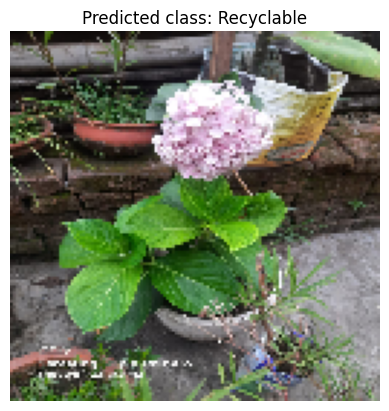

d.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


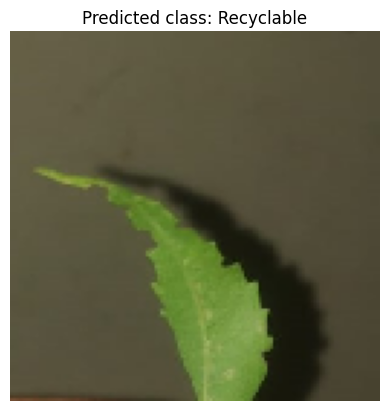

q.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


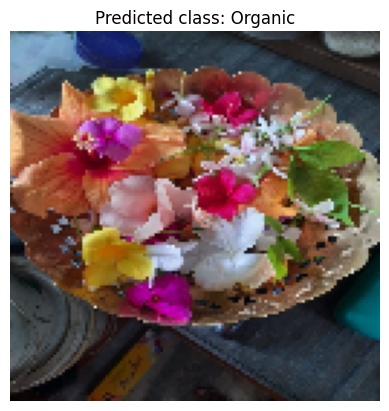

r.jpg: Predicted class is Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


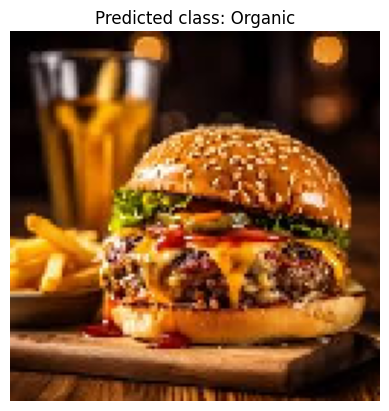

s.jpg: Predicted class is Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


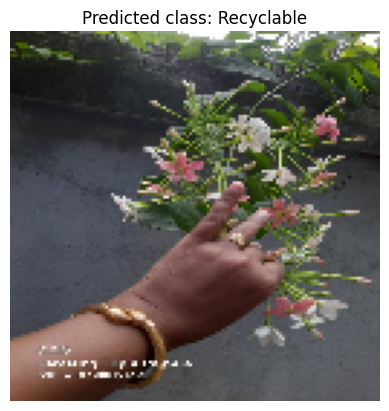

t.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


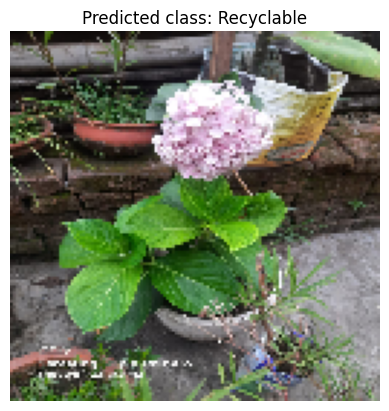

u.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


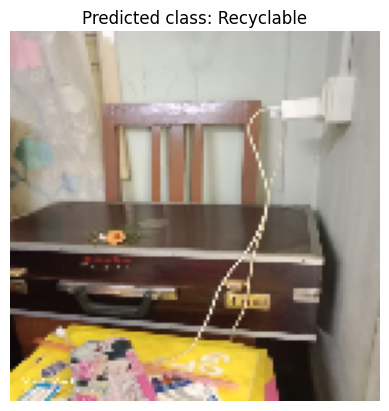

v.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


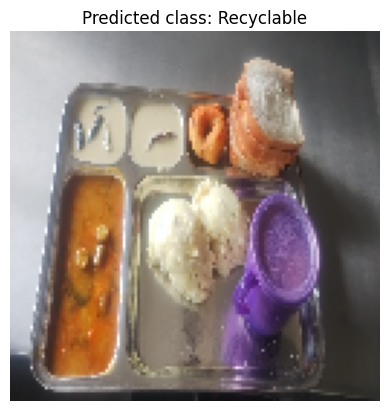

w.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


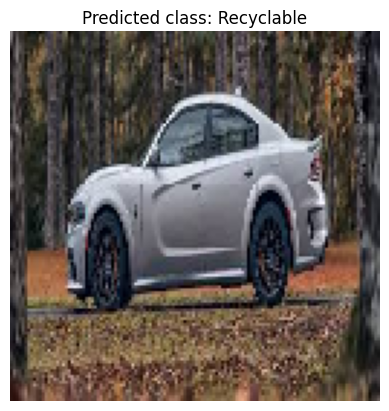

x.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


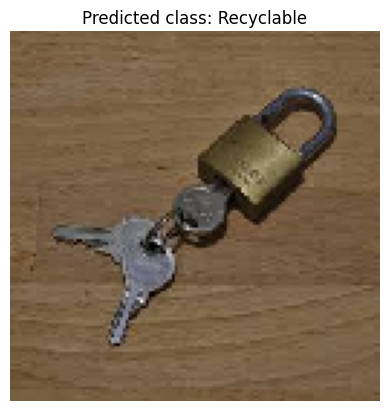

y.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


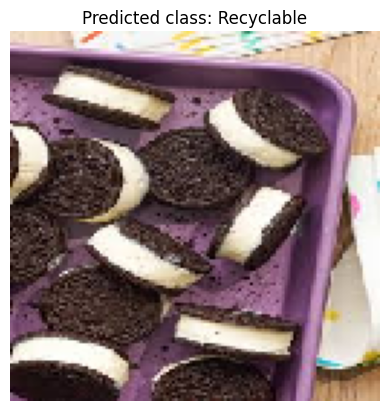

z.jpg: Predicted class is Recyclable

Results for user-uploaded images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
d.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
q.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
r.jpg: Predicted class is Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
s.jpg: Predicted class is Organic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
t.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
u.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
v.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
w.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
x.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
y.jpg: Predicted class is Recyclable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
z.jpg: Predicted class is Recyclable


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_waste(image_path, model, display_image=False):
    """
    Predict the waste classification for a given image.

    Args:
        image_path (str): Path to the image file.
        model: Pretrained TensorFlow/Keras model.
        display_image (bool): Whether to display the image with the prediction.

    Returns:
        str: Predicted class ('Recyclable' or 'Organic').
    """
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = 'Recyclable' if prediction > 0.5 else 'Organic'

    if display_image:
        # Display the image
        plt.imshow(img)
        plt.title(f'Predicted class: {predicted_class}')
        plt.axis('off')  # Hide the axes
        plt.show()

    return predicted_class

# Predict and display results for predefined test images
user_test_images = ['d.jpg', 'q.jpg', 'r.jpg', 's.jpg',
                    't.jpg', 'u.jpg', 'v.jpg', 'w.jpg', 'x.jpg', 'y.jpg', 'z.jpg']

print("Results for predefined test images:")
for test_image in user_test_images:
    result = predict_waste(test_image, model, display_image=True)
    print(f'{test_image}: Predicted class is {result}')

# Predict and print results for user-uploaded images
user_uploaded_images = ['d.jpg', 'q.jpg', 'r.jpg', 's.jpg', 't.jpg', 'u.jpg', 'v.jpg', 'w.jpg', 'x.jpg', 'y.jpg', 'z.jpg']

print("\nResults for user-uploaded images:")
for user_image in user_uploaded_images:
    result = predict_waste(user_image, model, display_image=False)
    print(f'{user_image}: Predicted class is {result}')


Capturing image 1/5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image 1 captured and classified as Recyclable.
Waiting 15 seconds for the next capture...
Capturing image 2/5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image 2 captured and classified as Recyclable.
Waiting 15 seconds for the next capture...
Capturing image 3/5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image 3 captured and classified as Recyclable.
Waiting 15 seconds for the next capture...
Capturing image 4/5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 4 captured and classified as Recyclable.
Waiting 15 seconds for the next capture...
Capturing image 5/5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image 5 captured and classified as Recyclable.

Displaying all predictions:


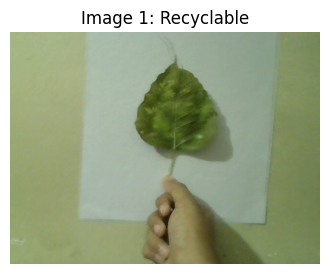

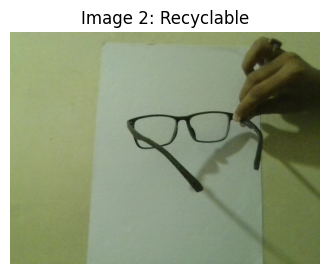

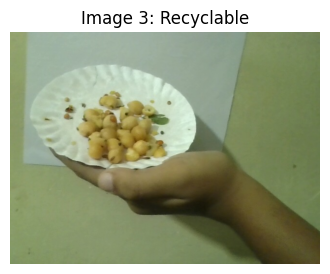

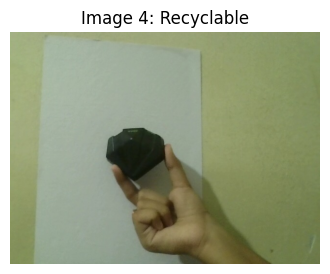

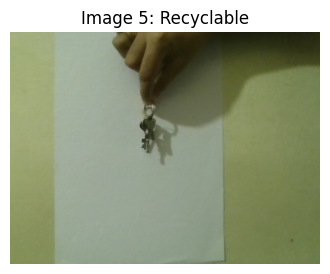

In [ ]:
import time
from IPython.display import clear_output

def predict_multiple_wastes_from_camera(model, num_images=5, interval=15):
    """
    Capture multiple images using the camera, predict their waste type, and display the images with predictions.

    Args:
        model: Pretrained TensorFlow/Keras model.
        num_images (int): Number of images to capture and predict.
        interval (int): Interval (in seconds) between consecutive captures.
    """
    predictions = []

    for i in range(num_images):
        print(f"Capturing image {i+1}/{num_images}...")
        # Open the camera and capture an image
        image_data_url = open_camera()
        captured_image = decode_image(image_data_url)

        # Convert to PIL format for TensorFlow preprocessing
        pil_image = Image.fromarray(captured_image)
        pil_image = pil_image.resize((128, 128))  # Resize to target size
        img_array = image.img_to_array(pil_image)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize the image

        # Predict the class
        prediction = model.predict(img_array)
        predicted_class = 'Recyclable' if prediction > 0.5 else 'Organic'

        # Store the result for display
        predictions.append((captured_image, predicted_class))

        # Display progress and wait for the next interval
        print(f"Image {i+1} captured and classified as {predicted_class}.")
        if i < num_images - 1:  # Skip the wait after the last image
            print(f"Waiting {interval} seconds for the next capture...")
            time.sleep(interval)

    # Display all captured images with predictions
    print("\nDisplaying all predictions:")
    for idx, (img, pred) in enumerate(predictions):
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Image {idx+1}: {pred}")
        plt.axis('off')  # Hide axes
        plt.show()

# Example usage with a loaded model
# Assuming `model` is your pre-trained TensorFlow/Keras model
predict_multiple_wastes_from_camera(model, num_images=5, interval=15)


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    """Preprocess the image by resizing and cropping to the target size."""
    img = cv2.imread(image_path)
    h, w, _ = img.shape
    # Center crop the image to make it square
    if h > w:
        diff = h - w
        img = img[diff // 2: -diff // 2, :]  # Crop height
    elif w > h:
        diff = w - h
        img = img[:, diff // 2: -diff // 2]  # Crop width

    # Resize to target size
    img_resized = cv2.resize(img, target_size)
    return img_resized

def predict_waste(image_path, model):
    """Predict the waste type using the trained model."""
    # Preprocess the image
    img = preprocess_image(image_path, target_size=(128, 128))
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict the class
    prediction = model.predict(img_array)
    if prediction > 0.5:
        return 'Recyclable'
    else:
        return 'Organic'

def capture_image_and_predict(model, save_path='real_time_image.jpg'):
    """Capture an image from the camera, preprocess it, and predict the waste type."""
    # Initialize the camera (ID 0 for default camera)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    print("Capturing image. Please wait...")
    ret, frame = cap.read()

    if ret:
        # Save the captured frame to the specified path
        cv2.imwrite(save_path, frame)
        print(f"Image saved to {save_path}")

        # Perform prediction
        result = predict_waste(save_path, model)
        print(f'The predicted class is: {result}')
    else:
        print("Error: Failed to capture image.")

    # Release the camera and close windows
    cap.release()
    cv2.destroyAllWindows()

# Assuming `model` is already loaded
capture_image_and_predict(model)


Error: Could not open camera.


In [ ]:
# Import necessary libraries
import os
import shutil
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Define the save path for the model
save_path = '/content/drive/MyDrive/trained_model.h5'

# Check if the save path is a directory
if os.path.isdir(save_path):
    print(f"Error: {save_path} is a directory. Removing it...")
    shutil.rmtree(save_path)  # Remove the directory

# Ensure the parent directory exists
os.makedirs('/content/drive/MyDrive', exist_ok=True)

# Save the model
try:
    model.save(save_path)
    print(f"Model successfully saved to {save_path}")
except Exception as e:
    print(f"Error occurred while saving the model: {e}")


Model successfully saved to /content/drive/MyDrive/trained_model.h5


In [ ]:
# List the contents of the directory to verify
!ls -lh /content/drive/MyDrive/


ls: '/content/drive/MyDrive/Alumni meet 2k24': No such file or directory
total 115M
-rw------- 1 root root 146K Dec 25  2021  14_Computer_science_New.pdf
-rw------- 1 root root 157K Dec 25  2021  16260-57042-1-SM.pdf
-rw------- 1 root root 4.3M Mar  1  2024  17092741844608166069126232758476.jpg
-rw------- 1 root root 123K Dec 25  2021  2320603_1173040_LoanApplicationForm.pdf
-rw------- 1 root root 123K Dec 25  2021  2320603_1173047_LoanApplicationForm.pdf
-rw------- 1 root root  48K Dec 25  2021  2320603_ForgotPass.pdf
-rw------- 1 root root 123K Dec 25  2021 '2338435_1189772_LoanApplicationForm (1).pdf'
-rw------- 1 root root 123K Dec 25  2021  2338435_1189772_LoanApplicationForm.pdf
-rw------- 1 root root  79K Dec 25  2021  3021824-1-MAY_provisional_marksheet.pdf
-rw------- 1 root root 2.0M Dec 25  2021  601a2c94eb6b0192935223_Course__Brochure___vel_tech.pdf
-rw------- 1 root root 4.3M Dec 25  2021  601a2cb075ecb289739156_Entance_Exam_Brochure.pdf
-rw------- 1 root root 367K Dec 25  

In [ ]:
import tensorflow as tf
import numpy as np
import json

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

# Prepare your input data
input_data = np.random.rand(1, 128, 128, 3).astype(np.float32)  # Replace with actual input
input_data /= 255.0  # Normalize the input if needed

# Get the prediction
prediction = model.predict(input_data)
predicted_class = "Recyclable" if prediction > 0.5 else "Organic"

# Save the output (e.g., class and raw score)
output = {
    "predicted_class": predicted_class,
    "raw_score": float(prediction[0][0])  # Convert to Python float for JSON serialization
}

# Save to a JSON file
output_path = '/content/drive/MyDrive/prediction_output.json'
with open(output_path, 'w') as f:
    json.dump(output, f)

print(f"Prediction output saved at {output_path}")


1/1 [==============================] - 0s 82ms/step
Prediction output saved at /content/drive/MyDrive/prediction_output.json


In [ ]:
import tensorflow as tf
import numpy as np
import json

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

# Prepare your input data (batch of data)
# Example: Create a batch of 5 random input samples
num_samples = 5
input_data = np.random.rand(num_samples, 128, 128, 3).astype(np.float32)  # Replace with actual inputs
input_data /= 255.0  # Normalize the inputs if needed

# Get the predictions
predictions = model.predict(input_data)

# Prepare outputs for all samples
outputs = []
for i, prediction in enumerate(predictions):
    predicted_class = "Recyclable" if prediction > 0.5 else "Organic"
    outputs.append({
        "sample_index": i,
        "predicted_class": predicted_class,
        "raw_score": float(prediction[0])  # Convert to Python float
    })

# Save all outputs to a JSON file
output_path = '/content/drive/MyDrive/predictions_output.json'
with open(output_path, 'w') as f:
    json.dump(outputs, f, indent=4)  # Use `indent` for better readability

print(f"Predictions output saved at {output_path}")


1/1 [==============================] - 0s 88ms/step
Predictions output saved at /content/drive/MyDrive/predictions_output.json


In [ ]:
import tensorflow as tf
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

# Define input image folder
image_folder = '/content/drive/MyDrive/input_images/'  # Folder containing input images

# Prepare a list to store preprocessed images and their filenames
input_data = []
image_filenames = []

# Preprocess each image in the folder
for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)
    try:
        # Load and preprocess the image
        img = load_img(file_path, target_size=(128, 128))  # Resize to match the model input size
        img_array = img_to_array(img)  # Convert to array
        img_array = img_array.astype(np.float32) / 255.0  # Normalize the pixel values

        # Display the image using matplotlib
        plt.imshow(img)
        plt.title(f"Processing: {filename}")
        plt.axis('off')  # Turn off axis labels
        plt.show()

        # Add to the list for batch prediction
        input_data.append(img_array)
        image_filenames.append(filename)

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Convert input_data to a NumPy array for batch prediction
input_data = np.array(input_data)

# Get predictions
predictions = model.predict(input_data)

# Prepare outputs for all images
outputs = []
for i, prediction in enumerate(predictions):
    predicted_class = "Recyclable" if prediction > 0.5 else "Organic"
    outputs.append({
        "filename": image_filenames[i],
        "predicted_class": predicted_class,
        "raw_score": float(prediction[0])  # Convert to Python float
    })

# Save all outputs to a JSON file
output_path = '/content/drive/MyDrive/predictions_output.json'
with open(output_path, 'w') as f:
    json.dump(outputs, f, indent=4)  # Use `indent` for better readability

print(f"Predictions output saved at {output_path}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/trained_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import tensorflow as tf

# Load your trained model (if not already in memory)
model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = '/content/drive/MyDrive/trained_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved at {tflite_model_path}")


TFLite model saved at /content/drive/MyDrive/trained_model.tflite


In [ ]:
# Post-training quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quantized = converter.convert()

# Save the quantized TFLite model
quantized_model_path = '/content/drive/MyDrive/trained_model_quantized.tflite'
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_model_quantized)

print(f"Quantized TFLite model saved at {quantized_model_path}")


Quantized TFLite model saved at /content/drive/MyDrive/trained_model_quantized.tflite


In [ ]:
import os

# Path to the TFLite model
tflite_model_path = '/content/drive/MyDrive/trained_model_quantized.tflite'

# Check the file size in bytes
model_size = os.path.getsize(tflite_model_path)
print(f"Model size: {model_size / 1024:.2f} KB")


Model size: 3237.59 KB
